### Analyze Imaging Mass Cytometry Data with Squidpy ###

Data Source: Jackson, H.W., Fischer, J.R., Zanotelli, V.R.T. et al. The single-cell pathology landscape of breast cancer. Nature 578, 615–620 (2020). https://doi.org/10.1038/s41586-019-1876-x

Date: 06/17/2023

In [1]:
# Import packages: Make sure to have squidpy package installed through conda forge.
import squidpy as sq

# Check squidpy version
print(f"squidpy=={sq.__version__}")

squidpy==1.2.2


In [2]:
# Load data that has been pre-processed.
adata = sq.datasets.imc()

  0%|          | 0.00/1.50M [00:00<?, ?B/s]

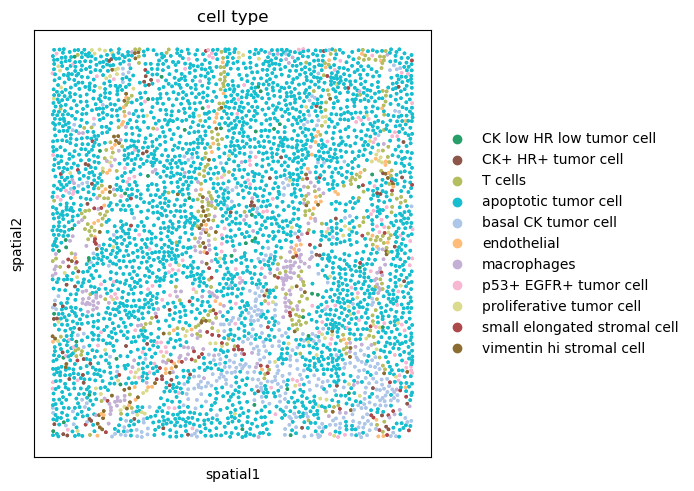

In [5]:
# Visualize cluster annotation in spatial context. This should show us how the type of cells distributed
# across the tissue.
sq.pl.spatial_scatter(adata, shape=None, color="cell type", size=10)

  0%|          | 0/1 [00:00<?, ?/s]

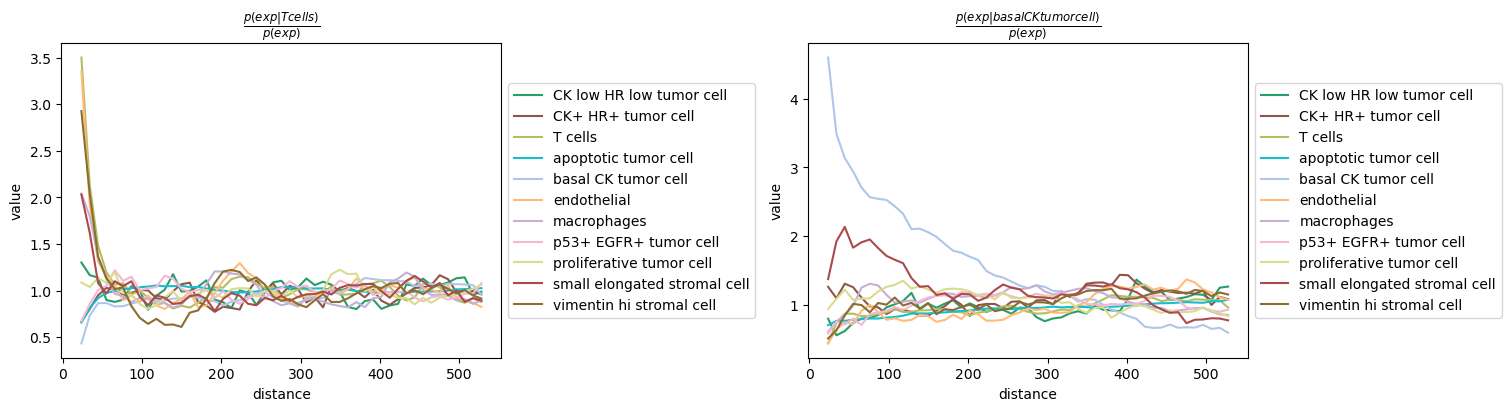

In [6]:
# Visualize cluster co-occurrence in spatial dimensions using spatial coordinates.
# Formula applied: \frac{p(exp|cond)}{p(exp)}

sq.gr.co_occurrence(adata, cluster_key="cell type")
sq.pl.co_occurrence(
     adata,
     cluster_key="cell type",
     clusters=["basal CK tumor cell", "T cells"],
     figsize=(15, 4),
)

Based on the left plot, we could see that T cells, endothelial and vimentin hi stromal cell co-occur with one another. Basal CK tumor cell on the other hand seem to cluster together.

  0%|          | 0/1000 [00:00<?, ?/s]

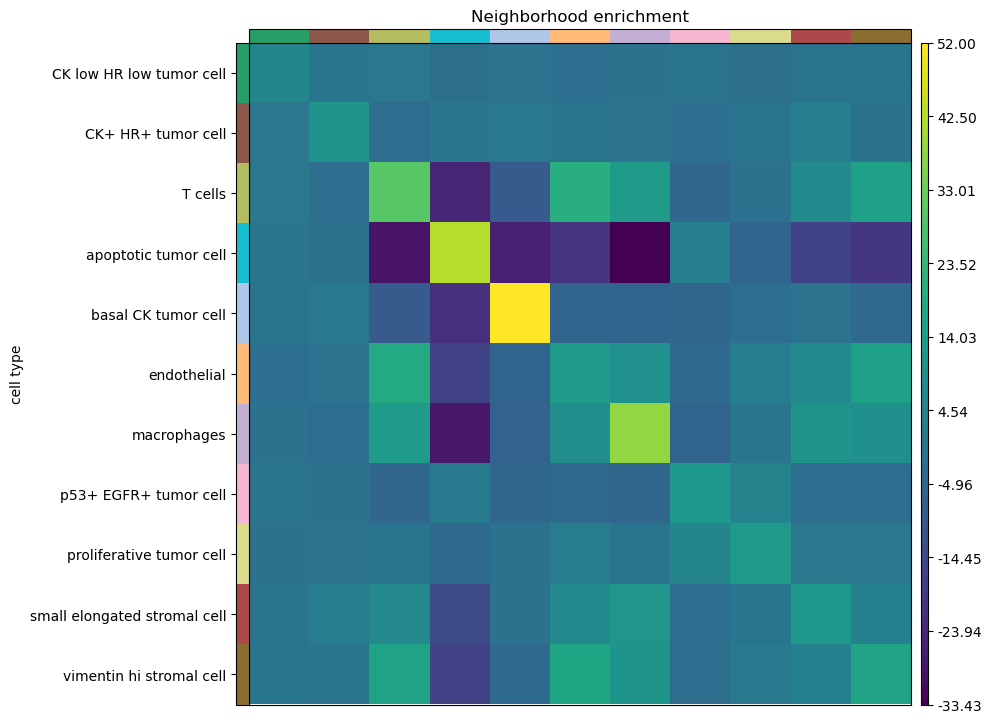

In [7]:
# Visualize through neighborhood enrichment:
sq.gr.spatial_neighbors(adata)
sq.gr.nhood_enrichment(adata, cluster_key="cell type")
sq.pl.nhood_enrichment(adata, cluster_key="cell type")

This provide information on the neighbor structure of tissue. The objective of the analysis is if spots belong to two different clusters are close to each other, resulting in a high score.

Based on the plot shown above, T cells shows an enrichment with stromal and endothelial cells, as well as macrophages. We also notice apoptotic tumor cells, being uniformly spread across the tissue area, show a neighbor depletion against any other cluster (but a strong enrichment for itself).

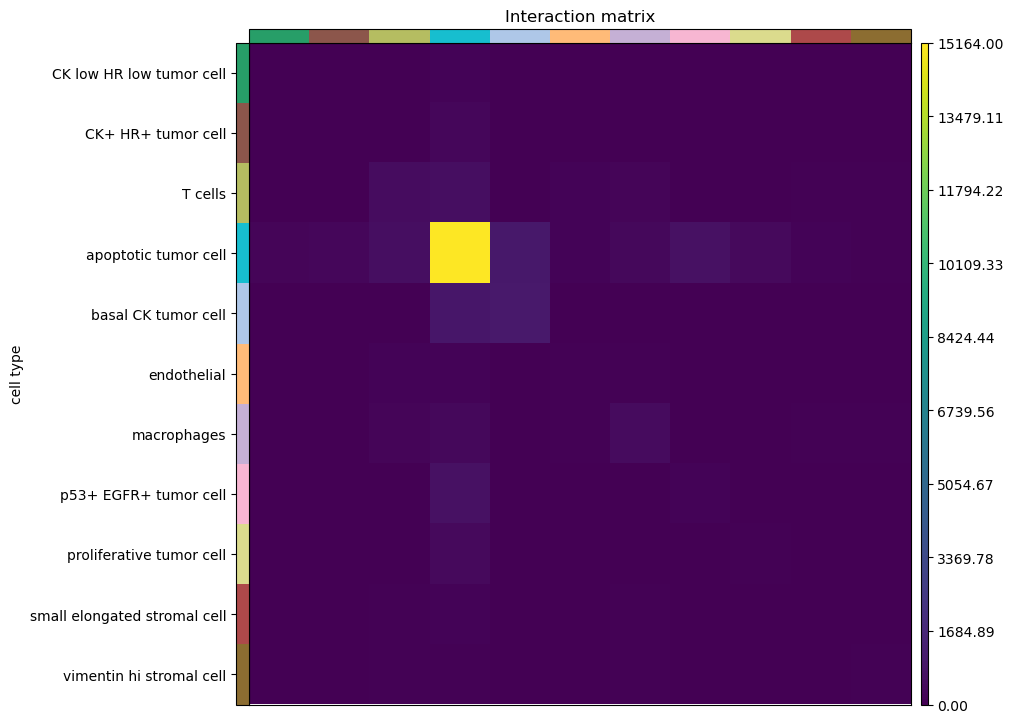

In [8]:
# Visualize through interaction matrix and network centralities
sq.gr.interaction_matrix(adata, cluster_key="cell type")
sq.pl.interaction_matrix(adata, cluster_key="cell type")

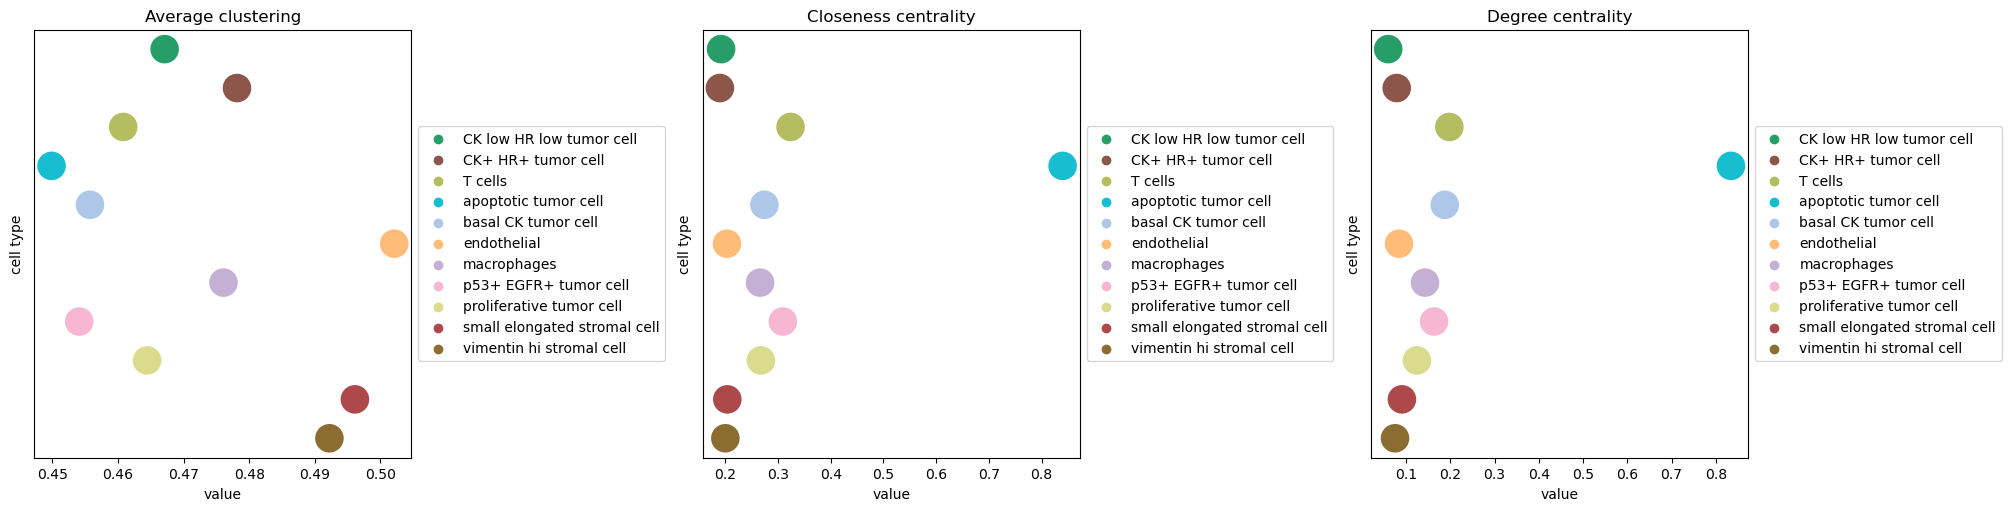

In [9]:
# Visualize spatial graph by computing different network centralities:
sq.gr.centrality_scores(
    adata,
    cluster_key="cell type",
)
sq.pl.centrality_scores(adata, cluster_key="cell type", figsize=(20, 5), s=500)

Based on the plots shown above, we can see that apoptopic tumor cell clusters show high closeness centrality. This indicates the nodes belonging to that group are often close to each other in the spatial graph.